Notebook de Análisis Exploratorio de Datos (EDA)
Dataset: citas_sinteticas.csv

In [2]:
# ----------------------------
# 1. Importar librerías
# ----------------------------
import pandas as pd                 # Para manipulación de datos
import numpy as np                  # Para operaciones numéricas
import matplotlib.pyplot as plt     # Para gráficos
import seaborn as sns               # Para gráficos estadísticos

# Configuración estética de seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
# ----------------------------
# 2. Cargar dataset
# ----------------------------
df = pd.read_csv("../data/citas_sinteticas.csv")  # Ajustar ruta según ubicación
print("Dimensiones del dataset:", df.shape)       # Mostrar número de filas y columnas
display(df.head())                                # Mostrar primeras filas


Dimensiones del dataset: (18300, 4)


,fecha_cita,centro_salud,especialidad,num_citas
0,2023-01-01,Centro_1,Medicia,3
1,2023-01-01,Centro_1,Pediatría,3
2,2023-01-01,Centro_1,Farmacia,4
3,2023-01-01,Centro_1,Enfermería,5
4,2023-01-01,Centro_1,Odontología,7


In [5]:
# ----------------------------
# 3. Revisión básica
# ----------------------------
print("Tipos de datos:\n", df.dtypes)           # Ver tipos de cada columna
print("\nValores nulos por columna:\n", df.isnull().sum())  # Revisar valores nulos
print("\nEstadísticas descriptivas:\n", df.describe())      # Estadísticas numéricas


Tipos de datos:
 fecha_cita      object
centro_salud    object
especialidad    object
num_citas        int64
dtype: object

Valores nulos por columna:
 fecha_cita      0
centro_salud    0
especialidad    0
num_citas       0
dtype: int64

Estadísticas descriptivas:
           num_citas
count  18300.000000
mean      10.201530
std        5.186266
min        1.000000
25%        6.000000
50%        9.000000
75%       14.000000
max       23.000000


In [11]:
# ----------------------------
# 4. Limpieza y transformación
# ----------------------------

# Convertir fecha_cita a tipo datetime
df["fecha_cita"] = pd.to_datetime(df["fecha_cita"])

# Verificar conversión
print(df.dtypes)


fecha_cita      datetime64[ns]
centro_salud            object
especialidad            object
num_citas                int64
dtype: object


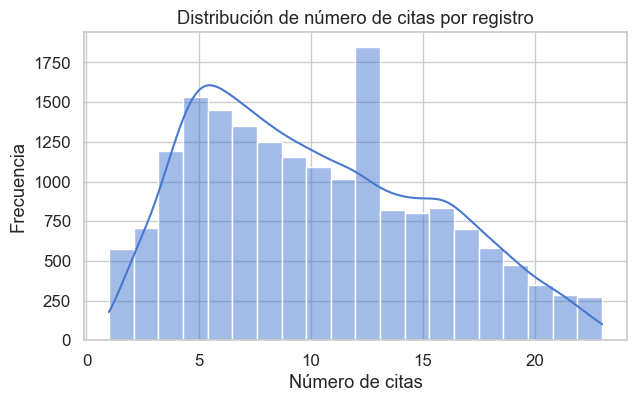

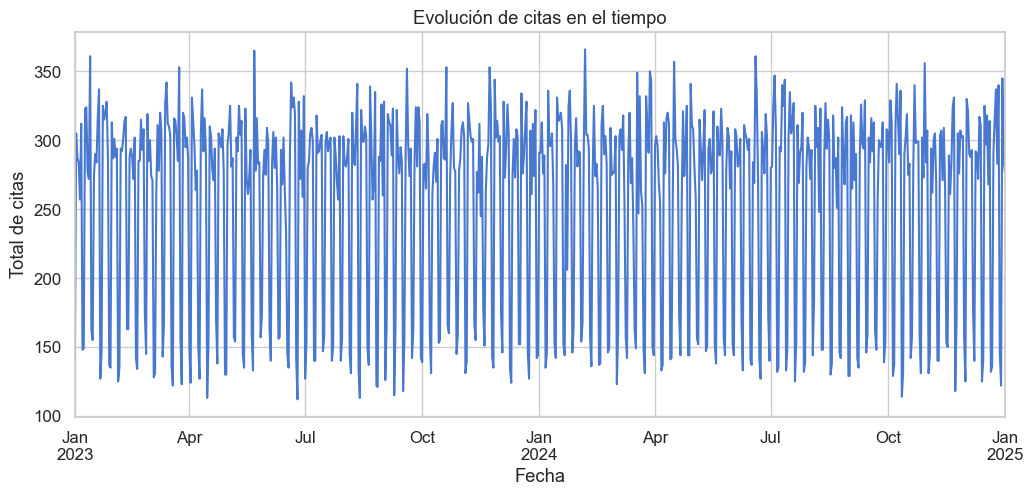

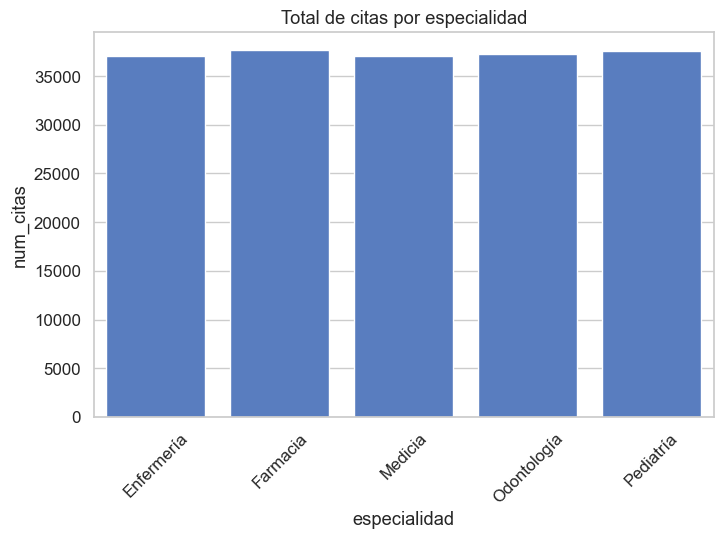

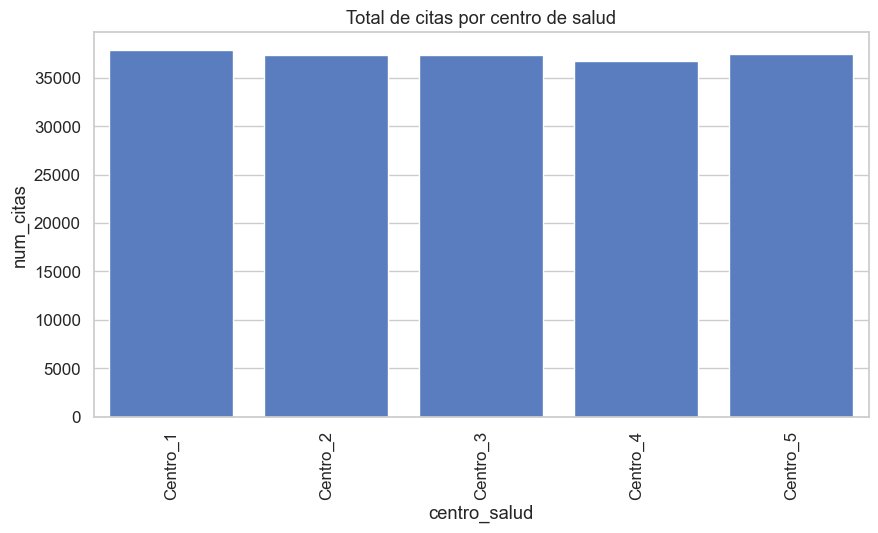

In [13]:
# ----------------------------
# 5. Visualización exploratoria
# ----------------------------

# 4.1 Distribución de número de citas
plt.figure(figsize=(7,4))
sns.histplot(df["num_citas"], bins=20, kde=True)
plt.title("Distribución de número de citas por registro")
plt.xlabel("Número de citas")
plt.ylabel("Frecuencia")
plt.show()

# 4.2 Evolución del total de citas en el tiempo
citas_por_fecha = df.groupby("fecha_cita")["num_citas"].sum()
plt.figure(figsize=(12,5))
citas_por_fecha.plot()
plt.title("Evolución de citas en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de citas")
plt.show()

# 4.3 Total de citas por especialidad
plt.figure(figsize=(8,5))
sns.barplot(
    data=df.groupby("especialidad")["num_citas"].sum().reset_index(),
    x="especialidad", y="num_citas"
)
plt.title("Total de citas por especialidad")
plt.xticks(rotation=45)
plt.show()

# 4.4 Total de citas por centro de salud
plt.figure(figsize=(10,5))
sns.barplot(
    data=df.groupby("centro_salud")["num_citas"].sum().reset_index(),
    x="centro_salud", y="num_citas"
)
plt.title("Total de citas por centro de salud")
plt.xticks(rotation=90)
plt.show()


Total de citas por día de la semana (ordenado):
dia_semana
Monday       31833
Tuesday      31335
Wednesday    31250
Thursday     30729
Friday       31405
Saturday     15078
Sunday       15058
Name: num_citas, dtype: int64


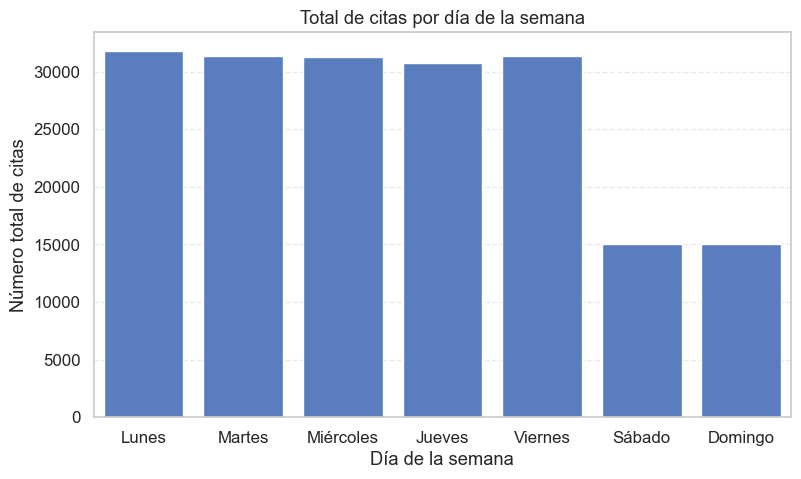

In [14]:

# ----------------------------
# 5.TOTAL DE CITAS POR DÍA DE LA SEMANA
# ----------------------------
# Extraemos el nombre del día en inglés (pandas devuelve day_name() en el idioma del sistema)
df['dia_semana'] = df['fecha_cita'].dt.day_name()  # 'Monday', 'Tuesday', ...

# Mapa para convertir nombres en inglés a español para presentaciones
mapa_dias = {
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}

# Orden de los días en inglés (usado para reindexar y mantener orden lógico)
orden_dias_en = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Agrupamos por día de la semana sumando el número de citas y reindexamos para asegurar el orden
citas_semana = df.groupby('dia_semana')['num_citas'].sum().reindex(orden_dias_en)

# Imprimimos la tabla agregada para inspección rápida (valores por día, en orden)
print("Total de citas por día de la semana (ordenado):")
print(citas_semana)

# Convertimos los índices a etiquetas en español para la gráfica
etiquetas_es = [mapa_dias[d] for d in citas_semana.index]

# Gráfico de barras: total de citas por día de la semana
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))                                # Tamaño de la figura
sns.barplot(x=etiquetas_es, y=citas_semana.values)       # Dibujamos barras con labels en español
plt.title("Total de citas por día de la semana")         # Título del gráfico
plt.xlabel("Día de la semana")                           # Etiqueta eje X
plt.ylabel("Número total de citas")                      # Etiqueta eje Y
plt.grid(axis='y', linestyle='--', alpha=0.4)            # Grid horizontal ligero para lectura
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_25048\1163965668.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="especialidad", y="num_citas", data=df, palette="Set2")  # Boxplot por campo


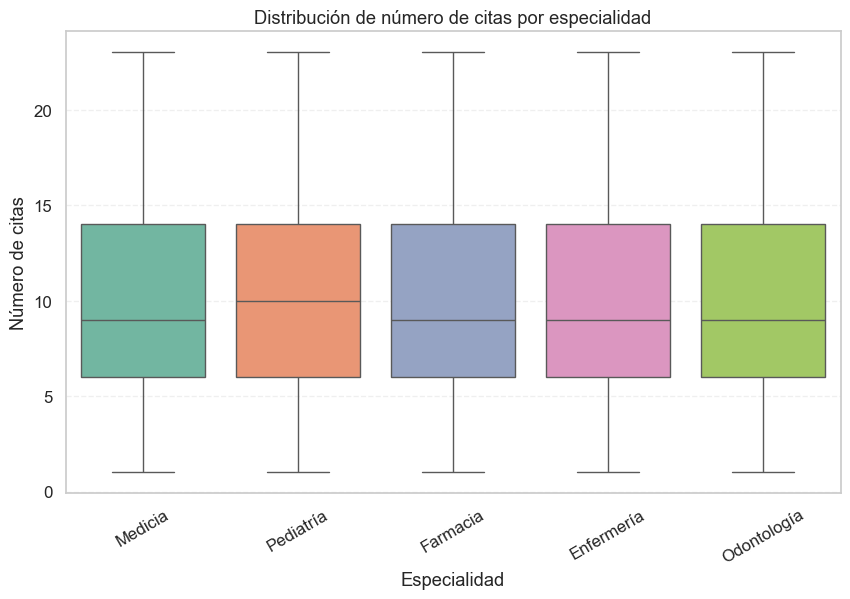


Estadísticas por especialidad (count, mean, std, min, 25%, 50%, 75%, max):
               count       mean       std  min  25%   50%   75%   max
especialidad                                                         
Enfermería    3660.0  10.130055  5.076999  1.0  6.0   9.0  14.0  23.0
Farmacia      3660.0  10.287705  5.194970  1.0  6.0   9.0  14.0  23.0
Medicia       3660.0  10.124044  5.231500  1.0  6.0   9.0  14.0  23.0
Odontología   3660.0  10.187432  5.166943  1.0  6.0   9.0  14.0  23.0
Pediatría     3660.0  10.278415  5.259469  1.0  6.0  10.0  14.0  23.0


In [16]:
# ----------------------------
# 6. BOXPLOT: DISTRIBUCIÓN DE CITAS POR ESPECIALIDAD
# ----------------------------
# Mostramos un boxplot por especialidad para ver la mediana, IQR y outliers
plt.figure(figsize=(10,6))                                # Tamaño de la figura
sns.boxplot(x="especialidad", y="num_citas", data=df, palette="Set2")  # Boxplot por campo
plt.title("Distribución de número de citas por especialidad")  # Título
plt.xlabel("Especialidad")                               # Etiqueta eje X
plt.ylabel("Número de citas")                            # Etiqueta eje Y
plt.xticks(rotation=30)                                  # Rotar etiquetas para legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.3)            # Grid horizontal
plt.show()

# Imprimimos estadísticas resumen por especialidad para completar la info visual
print("\nEstadísticas por especialidad (count, mean, std, min, 25%, 50%, 75%, max):")
print(df.groupby("especialidad")["num_citas"].describe())
